In [ ]:
import os
os.chdir('/content/drive/MyDrive/majorfiles')
os.listdir()

['val', 'train', 'cnn_train.py']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import PIL as Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
train = datagen.flow_from_directory('./train', seed=123, subset= 'training')
data = datagen.flow_from_directory('./train', seed=123, subset= 'validation')

test = datagen2.flow_from_directory('./val')

Found 7009 images belonging to 10 classes.
Found 3003 images belonging to 10 classes.
Found 1020 images belonging to 10 classes.


In [ ]:
pip install Pillow

In [ ]:
from PIL import Image


In [ ]:
classes = os.listdir('./val')


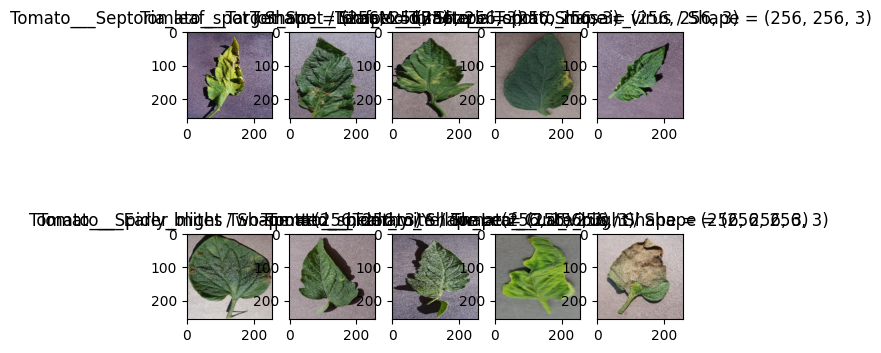

In [ ]:
for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image_path = './train/' + i[1] + '/' + pic
    image = Image.open(image_path)  # Corrected line
    image = np.asarray(image)
    plt.subplot(2, 5, i[0] + 1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()


In [ ]:
base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)

for layers in base_model.layers[:140]:
  layers.trainable = False
for layers in base_model.layers[140:]:
  layers.trainable = True

234545216/234545216 [==============================] - 2s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation= 'relu')(x)
pred = Dense(10, activation= 'softmax')(x)

model = Model(inputs=base_model.input, outputs=pred)

In [ ]:
model = Model(inputs=base_model.input, outputs=pred)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 130, 130, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

In [ ]:
model.fit(train, batch_size=80, epochs=15, validation_data=data)

Epoch 1/15
 14/220 [>.............................] - ETA: 2:32:05 - loss: 2.1227 - accuracy: 0.2790

KeyboardInterrupt: 

In [ ]:
<tensorflow.python.keras.callbacks.History at 0x7b2ed0248710>

In [ ]:
classes = os.listdir('./val')
plt.figure(figsize=(18,28))

for i in enumerate(classes):
  pic = os.listdir('./val/'+i[1])
  pic = pic[np.random.randint(len(pic)-2)]
  image = Image.open('./val/'+i[1]+'/'+pic)
  image = np.asarray(image)

  pred = np.argmax(model.predict(image.reshape(-1,256,256,3)/255))
  for j in list(enumerate(list(test.class_indices.keys()))):
    if pred == j[0]:
      prediction = j[1]

  plt.subplot(5,2,i[0]+1)
  plt.title('Actual: {0} / predicted: {1}'.format(i[1], prediction))
  plt.imshow(image)
plt.show()

In [ ]:
model.save('/kaggle/working/tmt.keras')